<a href="https://colab.research.google.com/github/aashitadutta/FinancialNarrativeSummarization/blob/main/Text_Summarization_Using_Gensim_LSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from nltk.corpus import stopwords
import numpy as np
import pandas
import nltk
import re
from nltk import sent_tokenize

In [ ]:
!pip install Rouge

In [ ]:
!pip install rouge_score

In [ ]:
import math

In [ ]:
inp_data="/content/drive/MyDrive/lstm-input/"
out_data="/content/drive/MyDrive/lstm-summ/"

datasets={"text":inp_data,"summ":out_data}

data_categories=["training","validation","test"]

data={"articles":[],"summaries":[]}

['102.txt', '104.txt', '105.txt', '106.txt', '108.txt', '109.txt', '110.txt', '111.txt', '118.txt', '128.txt', '129.txt', '130.txt', '131.txt', '132.txt', '148.txt', '149.txt', '150.txt', '151.txt', '152.txt', '153.txt', '155.txt', '156.txt', '159.txt', '160.txt', '161.txt', '163.txt', '168.txt', '169.txt', '17.txt', '170.txt', '173.txt', '174.txt', '181.txt', '19.txt', '205.txt', '206.txt', '214.txt', '225.txt', '227.txt', '228.txt', '229.txt', '230.txt', '64.txt', '65.txt', '66.txt', '67.txt', '72.txt', '73.txt', '92.txt', '93.txt']
['102.txt', '104.txt', '105.txt', '106.txt', '108.txt', '109.txt', '110.txt', '111.txt', '118.txt', '128.txt', '129.txt', '130.txt', '131.txt', '132.txt', '148.txt', '149.txt', '150.txt', '151.txt', '152.txt', '153.txt', '155.txt', '156.txt', '159.txt', '160.txt', '161.txt', '163.txt', '168.txt', '169.txt', '17.txt', '170.txt', '173.txt', '174.txt', '181.txt', '19.txt', '205.txt', '206.txt', '214.txt', '225.txt', '227.txt', '228.txt', '229.txt', '230.txt'

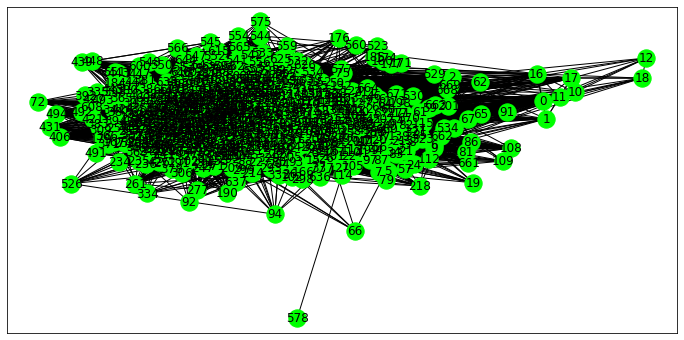

number of words in the model summary 7794
104.txt
file read successfully
104.txt
file read successfully
number of words in reference summary 4127
number of sentences in text file 1261


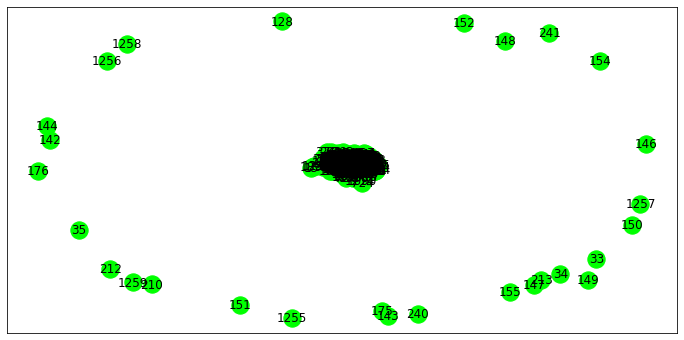

number of words in the model summary 8091
105.txt
file read successfully
105.txt
file read successfully
number of words in reference summary 4498
number of sentences in text file 1177


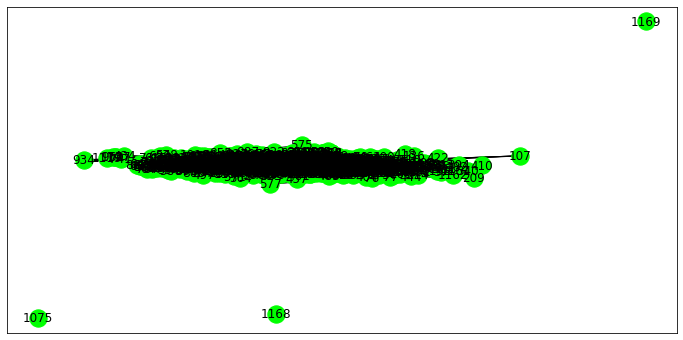

number of words in the model summary 8841
106.txt
file read successfully
106.txt
file read successfully
number of words in reference summary 5380
number of sentences in text file 1122


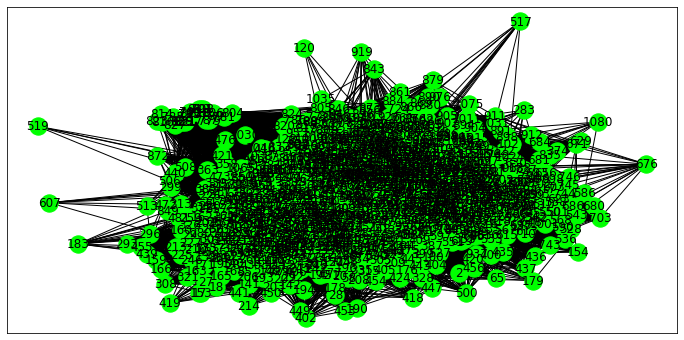

number of words in the model summary 6697
108.txt
file read successfully
108.txt
file read successfully
number of words in reference summary 7358
number of sentences in text file 1165


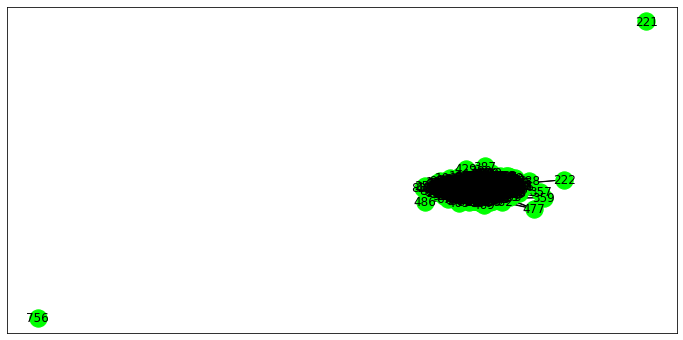

number of words in the model summary 6944
109.txt
file read successfully
109.txt
file read successfully
number of words in reference summary 3456
number of sentences in text file 1104


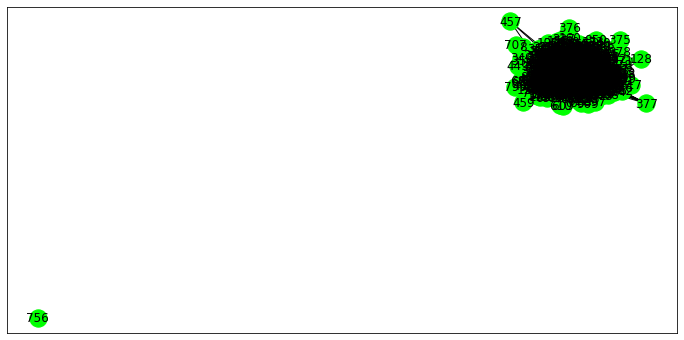

number of words in the model summary 11516
110.txt
file read successfully
110.txt
file read successfully
number of words in reference summary 4075
number of sentences in text file 1280


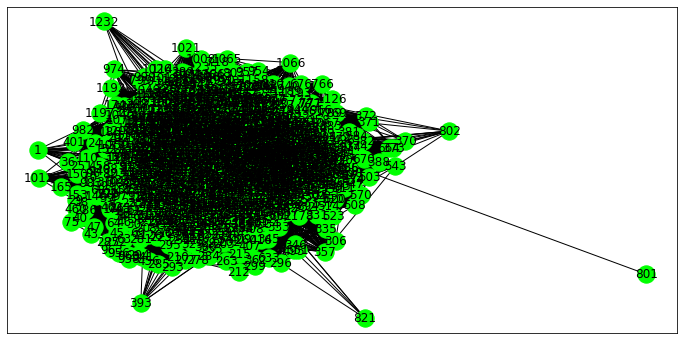

number of words in the model summary 12774
111.txt
file read successfully
111.txt
file read successfully
number of words in reference summary 6785
number of sentences in text file 1323


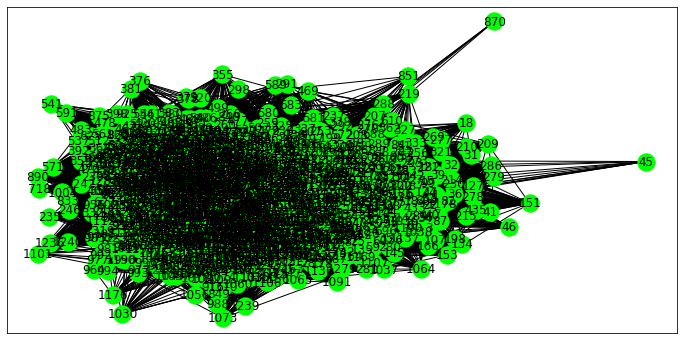

number of words in the model summary 11594
118.txt
file read successfully
118.txt
file read successfully
number of words in reference summary 847
number of sentences in text file 886


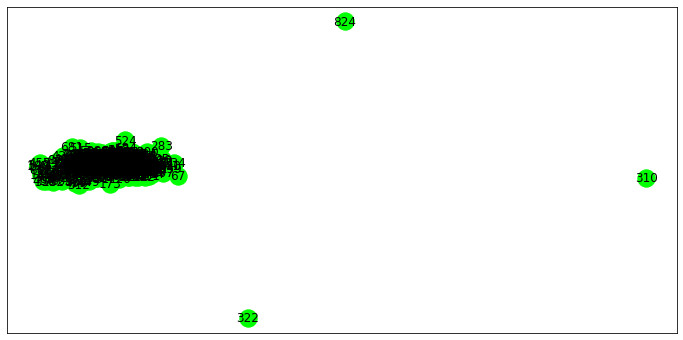

number of words in the model summary 6061
128.txt
file read successfully
128.txt
file read successfully
number of words in reference summary 2959
number of sentences in text file 608


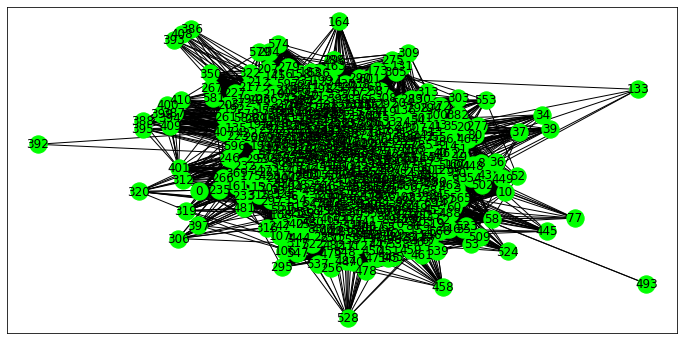

number of words in the model summary 6080
the average f1_score for rouge-1 is 0.2446032417321787
the average precision for rouge-1 is 0.19624780845557505
the average recall for rouge-1 is 0.3794958382136379
the average f1_score for rouge-2 is 0.06108975072001808
the average precision for rouge-2 is 0.05001269041268695
the average recall for rouge-2 is 0.0903892561636511
the average f1_score for rouge-L is 0.20869706343428845
the average precision for rouge-L is 0.18739377136300547
the average recall for rouge-L is 0.2513444403710257


In [ ]:
def parsetext(dire,category,filename):
    with open("%s/%s"%(dire,filename),'r',encoding="Latin-1") as readin:
        print("file read successfully")
        text=readin.read()
    return text.lower()


def load_data(dire,category):
    for (root,dirs,files) in os.walk(dire):
         filenames=sorted(files)
    return filenames


def cleantext(text):
    text=re.sub(r"what's","what is ",text)
    text=re.sub(r"it's","it is ",text)
    text=re.sub(r"\'ve"," have ",text)
    text=re.sub(r"i'm","i am ",text)
    text=re.sub(r"\'re"," are ",text)
    text=re.sub(r"n't"," not ",text)
    text=re.sub(r"\'d"," would ",text)
    text=re.sub(r"\'s","s",text)
    text=re.sub(r"\'ll"," will ",text)
    text=re.sub(r"can't"," cannot ",text)
    text=re.sub(r" e g "," eg ",text)
    text=re.sub(r"e-mail","email",text)
    text=re.sub(r"9\\/11"," 911 ",text)
    text=re.sub(r" u.s"," american ",text)
    text=re.sub(r" u.n"," united nations ",text)
    text=re.sub(r"\n"," ",text)
    text=re.sub(r":"," ",text)
    text=re.sub(r"-"," ",text)
    text=re.sub(r"\_"," ",text)
    text=re.sub(r"\d+"," ",text)
    text=re.sub(r"[$#@%&*!~?%{}()]"," ",text)
    
    return text

def printArticlesum(k):
    print("---------------------original sentence-----------------------")
    print("-------------------------------------------------------------")
    print(data["articles"][k])
    print("----------------------Summary sentence-----------------------")
    print("-------------------------------------------------------------")
    print(data["summaries"][k])
    return 0


def announcedone():
    duration=2000
    freq=440
    ws.Beep(freq,duration)

dict1={}
f1_score1=[]
precision1=[]
recall1=[]
f1_score2=[]
precision2=[]
recall2=[]
f1_scoreL=[]
precisionL=[]
recallL=[]
filenames1=load_data(datasets["text"],data_categories[0])
filenames2=load_data(datasets["summ"],data_categories[0])
print(filenames1)
print(filenames2)

"""----------load the data, sentences and summaries-----------"""
data["articles"]=[]
data["summaries"]=[]
k=0
while k<10:
 try:
    print(filenames1[k])
    data["articles"].append(parsetext(datasets["text"],data_categories[0],"%s"%filenames1[k]))
 except Exception as e:
    data["articles"].append("Could not read")
    print(e)
 try:
   print(filenames2[k])
   data["summaries"].append(parsetext(datasets["summ"],data_categories[0],"%s"%filenames2[k]))
 except Exception as e:
   data["summaries"].append("Could not read")
   print(e)
 
 reference=""
 reference=data["summaries"][k]
 print("number of words in reference summary",len(reference))
 import re

 DOCUMENT = re.sub(r'\n|\r', ' ', data["articles"][k])
 DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
 DOCUMENT = DOCUMENT.strip()
 sentences = nltk.sent_tokenize(DOCUMENT)
 print("number of sentences in text file",len(sentences))
 import numpy as np

 stop_words = nltk.corpus.stopwords.words('english')

 def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

 normalize_corpus = np.vectorize(normalize_document)

 norm_sentences = normalize_corpus(sentences)
 #norm_sentences[:3]
 from sklearn.feature_extraction.text import TfidfVectorizer
 import pandas as pd

 tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
 dt_matrix = tv.fit_transform(norm_sentences)
 dt_matrix = dt_matrix.toarray()

 vocab = tv.get_feature_names()
 td_matrix = dt_matrix.T
 #print(td_matrix.shape)
 pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)
 from scipy.sparse.linalg import svds
    
 def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt
 num_sentences = 8
 num_topics = 3

 u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
 #print(u.shape, s.shape, vt.shape)
 term_topic_mat, singular_values, topic_document_mat = u, s, vt
 sv_threshold = 0.5
 min_sigma_value = max(singular_values) * sv_threshold
 singular_values[singular_values < min_sigma_value] = 0
 salience_scores = np.sqrt(np.dot(np.square(singular_values), np.square(topic_document_mat)))
 top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
 top_sentence_indices.sort()
 similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
 #print(similarity_matrix.shape)
 np.round(similarity_matrix, 3)
 import networkx

 similarity_graph = networkx.from_numpy_array(similarity_matrix)
 #similarity_graph
 import matplotlib.pyplot as plt
 %matplotlib inline

 plt.figure(figsize=(12, 6))
 networkx.draw_networkx(similarity_graph, node_color='lime')
 plt.show()
 scores = networkx.pagerank(similarity_graph)
 ranked_sentences = sorted(((score, index) for index, score in scores.items()),reverse=True) 
 top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
 top_sentence_indices.sort()
 model_out='\n'.join(np.array(sentences)[top_sentence_indices])
 from rouge import Rouge
 print("number of words in the model summary",len(model_out))
 rouge = Rouge()
 scores = rouge.get_scores(model_out, reference)
 scores_rouge1 = [score['rouge-1']['r'] for score in scores]
 scores_rouge2 = [score['rouge-2']['r'] for score in scores]
 scores_rougeL = [score['rouge-l']['r'] for score in scores]                 
 recall1.append(scores_rouge1[0])
 recall2.append(scores_rouge2[0])
 recallL.append(scores_rougeL[0])
 scores_rouge1 = [score['rouge-1']['p'] for score in scores]
 scores_rouge2 = [score['rouge-2']['p'] for score in scores]
 scores_rougeL = [score['rouge-l']['p'] for score in scores]                 
 precision1.append(scores_rouge1[0])
 precision2.append(scores_rouge2[0])
 precisionL.append(scores_rougeL[0])
 scores_rouge1 = [score['rouge-1']['f'] for score in scores]
 scores_rouge2 = [score['rouge-2']['f'] for score in scores]
 scores_rougeL = [score['rouge-l']['f'] for score in scores]                 
 f1_score1.append(scores_rouge1[0])
 f1_score2.append(scores_rouge2[0])
 f1_scoreL.append(scores_rougeL[0])
 k=k+1

print("the average f1_score for rouge-1 is",math.fsum(f1_score1)/len(f1_score1))
print("the average precision for rouge-1 is",math.fsum(precision1)/len(precision1))
print("the average recall for rouge-1 is",math.fsum(recall1)/len(recall1))
print("the average f1_score for rouge-2 is",math.fsum(f1_score2)/len(f1_score2))
print("the average precision for rouge-2 is",math.fsum(precision2)/len(precision2))
print("the average recall for rouge-2 is",math.fsum(recall2)/len(recall2))
print("the average f1_score for rouge-L is",math.fsum(f1_scoreL)/len(f1_scoreL))
print("the average precision for rouge-L is",math.fsum(precisionL)/len(precisionL))
print("the average recall for rouge-L is",math.fsum(recallL)/len(recallL))
 
 

In [ ]:
print(f1_score1)
print(f1_score2)
print(f1_scoreL)

[0.31205673269214584, 0.3113713960715521, 0.29952606188850656, 0.32851791906539674, 0.2722050325684937, 0.15931108394517635, 0.17525083277112344, 0.23122839641448173, 0.10367577536142619, 0.2528891865434845]
[0.07200810869396738, 0.08695651712818167, 0.07495255720864609, 0.09962506199427455, 0.08314904410106912, 0.0251346466674037, 0.03882195113753795, 0.05910090719848047, 0.02077431319553364, 0.050374399875086184]
[0.19932810250807276, 0.24189525700213318, 0.2641056374676065, 0.22871664050025114, 0.21978021484552604, 0.1871794824577253, 0.21749408510839502, 0.21671826126772048, 0.12727272368688028, 0.1844802294985735]
